In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

### Step 1. Follow along with the tutorial to gain an understanding of the process

#### Followed the tutorial, QMNIST dataset contains 70,000 grayscale images of handwritten digits, each 28 by 28 pixels in size.

#### The images in the QMNIST dataset are represented as 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The corresponding labels are integers ranging from 0 to 9, each representing a handwritten digit. Each image is associated with a single label, indicating the digit it represents.


#### Here's the mapping of labels to digits:

          Label	Digit
            0	0
            1	1
            2	2
            3	3
            4	4
            5	5
            6	6
            7	7
            8	8
            9	9
    
#### Trains a neural network model to classify images of handwritten digits from the QMNIST dataset.

#### The QMNIST dataset contains 70,000 grayscale images of handwritten digits,  60,000 images are used for training the network, while 10,000 images are used for evaluating the model's performance. The dataset is divided into two parts: the training set, consisting of train_images and train_labels, and the test set, consisting of test_images and test_labels.

### Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset 

In [2]:
# Load Fashion MNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

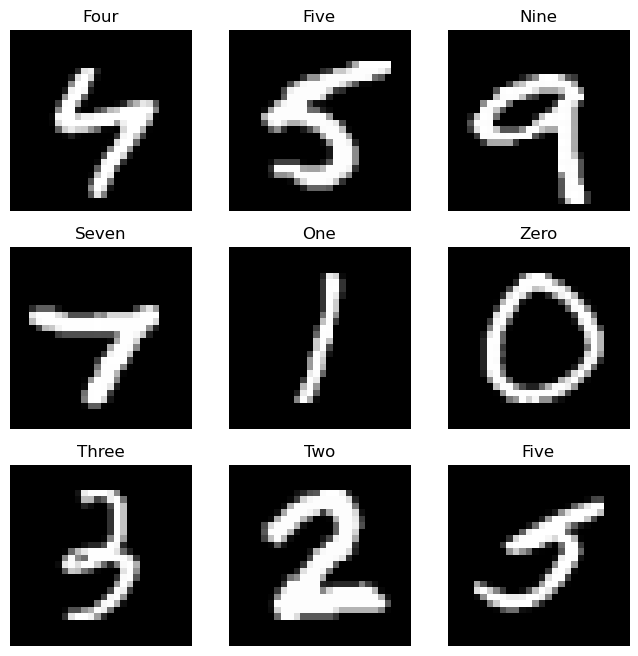

In [3]:
labels_map = {
    0: "Zero",
    1: "One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eight",
    9: "Nine",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

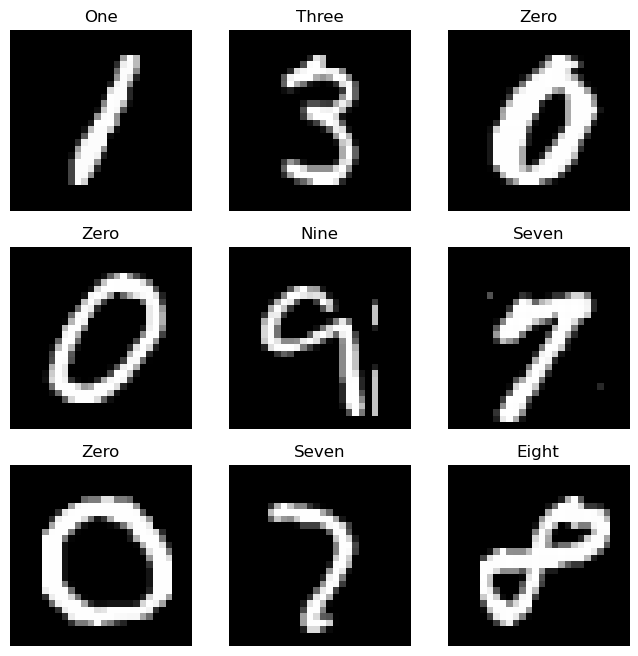

In [4]:
figure = plt.figure(figsize = (8,8))
cols, rows = 3, 3
for i in range(1, cols * rows +1):
    sample = torch.randint(len(test_dataset), size = (1,)).item()
    img, label = test_dataset[sample]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

In [5]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
        
    def forward(self,x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# Initialize the neural network
model = MLP()    


In [6]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

#Train the Neural Network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99: # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss : {running_loss / 100}')
            running_loss = 0.0

print("Finished Traning")
            

Epoch 1, Batch 100, Loss : 1.027490062713623
Epoch 1, Batch 200, Loss : 0.4033525849878788
Epoch 1, Batch 300, Loss : 0.38445175558328626
Epoch 1, Batch 400, Loss : 0.3327555073797703
Epoch 1, Batch 500, Loss : 0.30895735174417494
Epoch 1, Batch 600, Loss : 0.30627279095351695
Epoch 1, Batch 700, Loss : 0.30696209594607354
Epoch 1, Batch 800, Loss : 0.27213506545871496
Epoch 1, Batch 900, Loss : 0.24287730257958173
Epoch 2, Batch 100, Loss : 0.22453078769147397
Epoch 2, Batch 200, Loss : 0.21771402273327112
Epoch 2, Batch 300, Loss : 0.21190214868634938
Epoch 2, Batch 400, Loss : 0.1895000810176134
Epoch 2, Batch 500, Loss : 0.18962806425988674
Epoch 2, Batch 600, Loss : 0.1862807074934244
Epoch 2, Batch 700, Loss : 0.19125278554856778
Epoch 2, Batch 800, Loss : 0.15978295240551232
Epoch 2, Batch 900, Loss : 0.16061481092125177
Epoch 3, Batch 100, Loss : 0.13612799696624278
Epoch 3, Batch 200, Loss : 0.14734951524063944
Epoch 3, Batch 300, Loss : 0.15332881694659592
Epoch 3, Batch 400,

### Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

### Accuarcy on Test dataset

In [7]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100 / total}%')

Accuarcy on test set : 96.63166666666666%


### Accuarcy on Train dataset

In [8]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on train set : { correct * 100 / total}%')

Accuarcy on train set : 97.73%


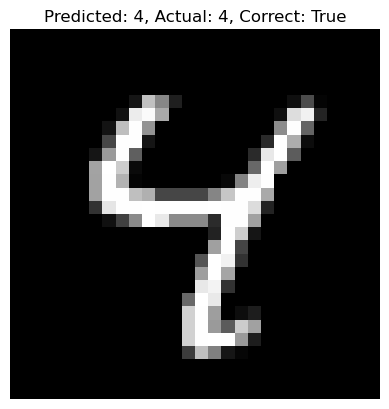

In [9]:
# Set the model to evaluation mode
model.eval()

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[6], labels[6]

# Predict label for the selected image
with torch.no_grad():
    # Ensure the image has a batch dimension
    image = image.unsqueeze(0)
    
    # Pass the image through the model
    output = model(image)
    
    # Get the index of the predicted label
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()


### Step 4. Choose one of the proposed modifications below:

#### Increased the current number of nodes in the layer to 256, the accuracy may be increased or decreased depending on the model.
#### While increasing the number of nodes from 128 to 256 can potentially improve accuracy by allowing the model to learn more complex representations.
#### There may be challenges such as overfitting and optimization difficulties, which may lead to decreased accuracy if not addressed properly through appropriate regularization and optimization techniques. 

### Step 5. Modify the model based on the chosen method and train

##### Increase the current number of nodes in the layer to 256

In [10]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        
        
    def forward(self,x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# Initialize the neural network
model = MLP()    


In [11]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

#Train the Neural Network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader,0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99: # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss : {running_loss / 100}')
            running_loss = 0

print("Finished Traning")
            

Epoch 1, Batch 100, Loss : 0.9590540888905525
Epoch 1, Batch 200, Loss : 0.4003845489025116
Epoch 1, Batch 300, Loss : 0.3581980064511299
Epoch 1, Batch 400, Loss : 0.31969088427722453
Epoch 1, Batch 500, Loss : 0.2961673390865326
Epoch 1, Batch 600, Loss : 0.2811990225315094
Epoch 1, Batch 700, Loss : 0.24865312151610852
Epoch 1, Batch 800, Loss : 0.25980047903954984
Epoch 1, Batch 900, Loss : 0.20961277429014444
Epoch 2, Batch 100, Loss : 0.20496771894395352
Epoch 2, Batch 200, Loss : 0.18675940927118062
Epoch 2, Batch 300, Loss : 0.1933339736610651
Epoch 2, Batch 400, Loss : 0.16131939232349396
Epoch 2, Batch 500, Loss : 0.16648627769201993
Epoch 2, Batch 600, Loss : 0.15849703300744294
Epoch 2, Batch 700, Loss : 0.157507594935596
Epoch 2, Batch 800, Loss : 0.15120670784264803
Epoch 2, Batch 900, Loss : 0.1432652834802866
Epoch 3, Batch 100, Loss : 0.12715331491082907
Epoch 3, Batch 200, Loss : 0.12418873587623239
Epoch 3, Batch 300, Loss : 0.11096999673172832
Epoch 3, Batch 400, Lo

### Step 6. Report on the results of the modified model and if it matches your hypothesis


In [12]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100/ total}%')

Accuarcy on test set : 96.86666666666666%


In [13]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on train set : { correct * 100 / total} %')

Accuarcy on train set : 97.90333333333334 %


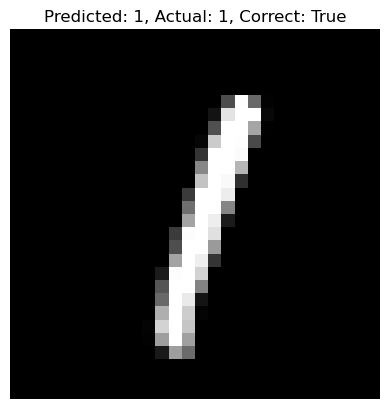

In [14]:
# Set the model to evaluation mode
model.eval()

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[5], labels[5]

# Predict label for the selected image
with torch.no_grad():
    # Ensure the image has a batch dimension
    image = image.unsqueeze(0)
    
    # Pass the image through the model
    output = model(image)
    
    # Get the index of the predicted label
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()


After training the model with 256 nodes, both the test accuracy and train accuracy saw a slight increase. The test accuracy improved to 96.86%, while the train accuracy also experienced a marginal rise to 97.90%. The accuracy improvement with 256 nodes compared to 128 nodes can be attributed to the enhanced capacity of the model, allowing for more intricate patterns to be learned and better generalization to unseen data.

### Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

##### MODEL 1 WITH NEW HYPER PARAMETERS
#### created a dropout layer with a dropout probability of 0.2 and used the dropout layer.
#### Changed the activation to sigmoid instead of relu
#### used SGD optimizer with learning rate of 0.01 instead of Adam optimizer
#### Increased num_epochs to 30 instead of 5

In [15]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 output classes for multi-class classification
        self.dropout = nn.Dropout(p=0.2)  #  created a dropout layer with a dropout probability of 0.2

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.sigmoid(self.fc1(x)) # Changed the activation to sigmoid instead of relu
        x = self.dropout(x)  # Applying dropout
        x = torch.sigmoid(self.fc2(x)) # Changed the activation to sigmoid instead of relu
        x = self.dropout(x)  # Applying dropout
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross Entropy Loss for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # used SGD optimizer instead of Adam optimizer

# Train the Neural Network
num_epochs = 30 # Increased num_epochs to 30 instead of 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Cross Entropy Loss
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # printing every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss : {running_loss / 100}')
            running_loss = 0.0

print("Finished Training")


Epoch 1, Batch 100, Loss : 2.3079179883003236
Epoch 1, Batch 200, Loss : 2.277683024406433
Epoch 1, Batch 300, Loss : 2.220755295753479
Epoch 1, Batch 400, Loss : 2.016712111234665
Epoch 1, Batch 500, Loss : 1.6461505258083344
Epoch 1, Batch 600, Loss : 1.32694380402565
Epoch 1, Batch 700, Loss : 1.1168594014644624
Epoch 1, Batch 800, Loss : 0.9542386102676391
Epoch 1, Batch 900, Loss : 0.8547914743423461
Epoch 2, Batch 100, Loss : 0.7417755442857742
Epoch 2, Batch 200, Loss : 0.685894080400467
Epoch 2, Batch 300, Loss : 0.6559780803322792
Epoch 2, Batch 400, Loss : 0.5857430243492127
Epoch 2, Batch 500, Loss : 0.5701770386099816
Epoch 2, Batch 600, Loss : 0.5407148614525795
Epoch 2, Batch 700, Loss : 0.5256455963850022
Epoch 2, Batch 800, Loss : 0.5049488054215908
Epoch 2, Batch 900, Loss : 0.4867502900958061
Epoch 3, Batch 100, Loss : 0.4633819621801376
Epoch 3, Batch 200, Loss : 0.47059875562787057
Epoch 3, Batch 300, Loss : 0.44569444194436075
Epoch 3, Batch 400, Loss : 0.434460263

Epoch 20, Batch 500, Loss : 0.13287648562341928
Epoch 20, Batch 600, Loss : 0.12930081926286222
Epoch 20, Batch 700, Loss : 0.13404991233721375
Epoch 20, Batch 800, Loss : 0.12875247338786722
Epoch 20, Batch 900, Loss : 0.13798922203481198
Epoch 21, Batch 100, Loss : 0.13062194937840105
Epoch 21, Batch 200, Loss : 0.13793674120679497
Epoch 21, Batch 300, Loss : 0.11820318352431058
Epoch 21, Batch 400, Loss : 0.11592008586972952
Epoch 21, Batch 500, Loss : 0.12733193904161452
Epoch 21, Batch 600, Loss : 0.11841850122436881
Epoch 21, Batch 700, Loss : 0.12916359011083842
Epoch 21, Batch 800, Loss : 0.13340390946716071
Epoch 21, Batch 900, Loss : 0.12629261141642928
Epoch 22, Batch 100, Loss : 0.11319926150143146
Epoch 22, Batch 200, Loss : 0.12076512075960637
Epoch 22, Batch 300, Loss : 0.1267739012464881
Epoch 22, Batch 400, Loss : 0.11268472466617822
Epoch 22, Batch 500, Loss : 0.13021059152670206
Epoch 22, Batch 600, Loss : 0.1344533186405897
Epoch 22, Batch 700, Loss : 0.115815611407

In [16]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100/ total}%')

Accuarcy on test set : 97.11333333333333%


In [17]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on train set : { correct * 100 / total} %')

Accuarcy on train set : 98.22666666666667 %


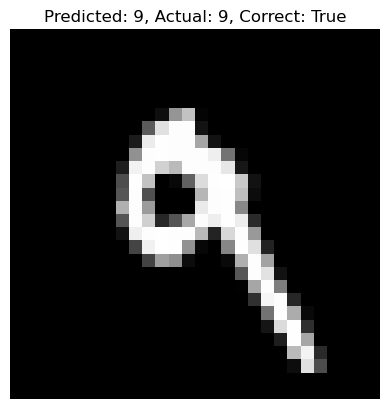

In [18]:
# Set the model to evaluation mode
model.eval()

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[7], labels[7]

# Predict label for the selected image
with torch.no_grad():
    # Ensure the image has a batch dimension
    image = image.unsqueeze(0)
    
    # Pass the image through the model
    output = model(image)
    
    # Get the index of the predicted label
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()


During training, the model optimized with the Adam optimizer discovered a better path for optimization, resulting in reduced loss values and higher accuracy. Conversely, when employing the Stochastic Gradient Descent (SGD) optimizer along with a dropout layer and extending the number of epochs to 30, switching the activation function from ReLU to sigmoid slightly boosted the accuracy for both the training and test datasets. However, this adjustment did not lead to a decrease in loss. Notably, utilizing the Adam optimizer consistently resulted in lower loss values.

##### MODEL 2 WITH NEW HYPER PARAMETERS
#### created a dropout layer with a dropout probability of 0.5 and used the dropout layer.
#### Changed the activation to yperbolic tangent (tanh) instead of sigmoid
#### Used Adagrad optimizer with learning rate 0.01 instead of SGD optimizer
#### Increased num_epochs to 40 instead of 30

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assume train_loader is defined elsewhere

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 output classes for multi-class classification
        self.dropout = nn.Dropout(p=0.5)  # created a dropout layer with a dropout probability of 0.5

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.tanh(self.fc1(x))  # Changed activation to hyperbolic tangent (tanh)
        x = self.dropout(x)  # Applying dropout
        x = torch.tanh(self.fc2(x))  # Changed activation to hyperbolic tangent (tanh)
        x = self.dropout(x)  # Applying dropout
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss(ignore_index=-100)  # Sparse Cross Entropy Loss for multi-class classification
optimizer = optim.Adagrad(model.parameters(), lr=0.01)  # Used Adagrad optimizer with learning rate 0.01

# Train the Neural Network
num_epochs = 40
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Cross Entropy Loss
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss : {running_loss / 100}')
            running_loss = 0.0

print("Finished Training")


Epoch 1, Batch 100, Loss : 1.8124920201301575
Epoch 1, Batch 200, Loss : 0.9454024648666381
Epoch 1, Batch 300, Loss : 0.7014959514141083
Epoch 1, Batch 400, Loss : 0.6208093583583831
Epoch 1, Batch 500, Loss : 0.5104651686549186
Epoch 1, Batch 600, Loss : 0.4998959070444107
Epoch 1, Batch 700, Loss : 0.4558557803928852
Epoch 1, Batch 800, Loss : 0.44873363837599756
Epoch 1, Batch 900, Loss : 0.4409989157319069
Epoch 2, Batch 100, Loss : 0.41861011818051336
Epoch 2, Batch 200, Loss : 0.3997546346485615
Epoch 2, Batch 300, Loss : 0.4043835002183914
Epoch 2, Batch 400, Loss : 0.38107344657182696
Epoch 2, Batch 500, Loss : 0.3986117009818554
Epoch 2, Batch 600, Loss : 0.38888884857296946
Epoch 2, Batch 700, Loss : 0.3499760912358761
Epoch 2, Batch 800, Loss : 0.3820019678771496
Epoch 2, Batch 900, Loss : 0.3545676474273205
Epoch 3, Batch 100, Loss : 0.36763593047857285
Epoch 3, Batch 200, Loss : 0.3554506078362465
Epoch 3, Batch 300, Loss : 0.34760611936450003
Epoch 3, Batch 400, Loss : 0

Epoch 20, Batch 400, Loss : 0.20020145891234278
Epoch 20, Batch 500, Loss : 0.19609616667032242
Epoch 20, Batch 600, Loss : 0.2211783618852496
Epoch 20, Batch 700, Loss : 0.20803601607680322
Epoch 20, Batch 800, Loss : 0.22173498600721359
Epoch 20, Batch 900, Loss : 0.2070568411052227
Epoch 21, Batch 100, Loss : 0.20789883967489003
Epoch 21, Batch 200, Loss : 0.20298992782831193
Epoch 21, Batch 300, Loss : 0.20386620048433543
Epoch 21, Batch 400, Loss : 0.19390369821339845
Epoch 21, Batch 500, Loss : 0.21288192886859178
Epoch 21, Batch 600, Loss : 0.2049633152410388
Epoch 21, Batch 700, Loss : 0.22668749578297137
Epoch 21, Batch 800, Loss : 0.2057937068492174
Epoch 21, Batch 900, Loss : 0.20185696717351675
Epoch 22, Batch 100, Loss : 0.19938560899347066
Epoch 22, Batch 200, Loss : 0.19471678629517555
Epoch 22, Batch 300, Loss : 0.21508526738733053
Epoch 22, Batch 400, Loss : 0.2024059870839119
Epoch 22, Batch 500, Loss : 0.20797564715147018
Epoch 22, Batch 600, Loss : 0.208633419275283

Epoch 39, Batch 500, Loss : 0.17761667586863042
Epoch 39, Batch 600, Loss : 0.1881572487577796
Epoch 39, Batch 700, Loss : 0.19119666505604982
Epoch 39, Batch 800, Loss : 0.1754986085370183
Epoch 39, Batch 900, Loss : 0.16346941735595466
Epoch 40, Batch 100, Loss : 0.19286342818289995
Epoch 40, Batch 200, Loss : 0.18450870960950852
Epoch 40, Batch 300, Loss : 0.17897533513605596
Epoch 40, Batch 400, Loss : 0.17676938008517026
Epoch 40, Batch 500, Loss : 0.1682490031607449
Epoch 40, Batch 600, Loss : 0.16942543674260377
Epoch 40, Batch 700, Loss : 0.17260853491723538
Epoch 40, Batch 800, Loss : 0.17766092784702778
Epoch 40, Batch 900, Loss : 0.17241077288985251
Finished Training


In [20]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on test set : { correct * 100/ total}%')

Accuarcy on test set : 96.31666666666666%


In [21]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        hb, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuarcy on train set : { correct * 100 / total} %')

Accuarcy on train set : 97.29 %


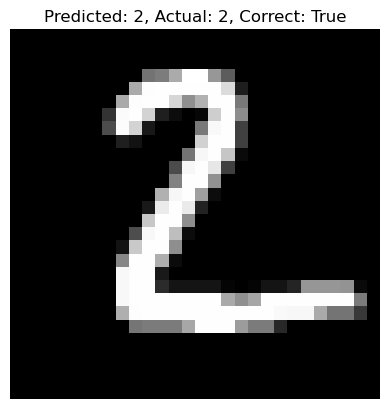

In [22]:
# Set the model to evaluation mode
model.eval()

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[1], labels[1]

# Predict label for the selected image
with torch.no_grad():
    # Ensure the image has a batch dimension
    image = image.unsqueeze(0)
    
    # Pass the image through the model
    output = model(image)
    
    # Get the index of the predicted label
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()


During training, the model optimized with the Adam optimizer discovered a better path for optimization, resulting in reduced loss values and higher accuracy. Conversely, when employing the Adagrad optimizer along with a dropout layer and extending the number of epochs to 40, switching the activation function from ReLU to tanh slightly boosted the accuracy for both the training and test datasets. However, this adjustment did not lead to a decrease in loss. Notably, utilizing the Adam optimizer consistently resulted in lower loss values.¶